In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
import time

In [17]:
# CONFIG Matplotlib Parameters
themes = ['default', 'classic', 'bmh', 'dark_background', 'fast']
plt.style.use('classic')                        # theme (use "plt.style.available" method to find out available themes)
plt.rcParams["figure.figsize"] = (17,11.5)      # figure size
plt.rcParams["font.size"] = 10                  # font size
plt.rcParams["text.color"] = "black"            # text color
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["axes.grid"] = True

## Bounded Method

In [3]:
def bisection(f, a, b, error):
    """
    Description: the bisection method for finding the roots of the equation using halving the interval method

    Inputs:
        f       - a function (defined as a lambda)
        a       - the left end of the interval
        b       - the right end of the interval
        error   - the length of the desired interval
    
    Output:
        the x value of the root
    
    Assumption/Notes:
        - the function must be a 2-dimensional one
        - there must be a root between the endpoints [a,b] otherwise the function fails
        - we calculate the number of iterations needed to reach a desired error value prescribed by the analytical formula
                ln( (b-a)/error ) / ln(2) - 1
    """

    if(f(a)*f(b) >= 0):
        print("The interval defined by [" + a + ", " + b + "] has no roots!")
        return None
    
    #calculate the number of iterations
    N =  int (math.log((b-a)/error, math.e) / math.log(2, math.e) - 1)
    print(f"Number of iterations required for {error} accuracy is {N}")
    mid_point = 0
    iter = 0
    start = time.perf_counter()
    for i in range(1, N+1):
        iter +=1
        #print("Iteration %d \n" %(iter))
        mid_point = (a+b)/2
        f_m = f(mid_point)
        if(f(a)*f_m < 0):
            b = mid_point
        elif (f(b)*f_m < 0):
            a = mid_point
        elif (f_m == 0):
            end = time.perf_counter()
            print(f"Bisection time: {(end-start)}")
            return mid_point
        else:
            print("Bisection method failed!")
    end = time.perf_counter()
    print(f"Bisection num iterations:{iter}")
    print(f"Bisection time: {(end-start)}")
    x = (a+b)/2
    print(f"Bisection result: x={x} f(x)={f(x)}")
    print()
    return x

## Unbounded Method

In [4]:
def NewtonMethod(f, d_f, error, x0):
    """
    Description: The famous Newton's method for finding/approximating the roots of an equation

    Inputs:
        f       - the function of interest
        d_f     - the derivative of the function
        error   - desired level of error/accuracy
        x0      - the starting/initial x point
    
    Notes:
        - Newton's method is an example of an unbounded algorithm for fidning the roots of an equation
        - It is relatively faster than the bounded algorithms for finding a root but it relies on a initial value
            i.e. it could fail if the initial value is not picked right
    """
    iter = 0
    start = time.perf_counter()
    while(abs(f(x0)) >= error):
        #print("Iteration %d\n" %(iter))
        iter +=1
        x0 = x0 - (f(x0)/d_f(x0))
        #print("x0: %3.3f" % (x0))
        if (d_f(x0) == 0):
            print("Zero derivative: can't proceed")
            return None
    end = time.perf_counter()
    print(f"Newton method num iterations:{iter}")
    print(f"Newton method time: {(end-start)}")
    print(f"Newton method result: x={x0} f(x)={f(x0)}")
    print()
    return x0

## Generating Functions and Finding their Roots 

### Polynomial 

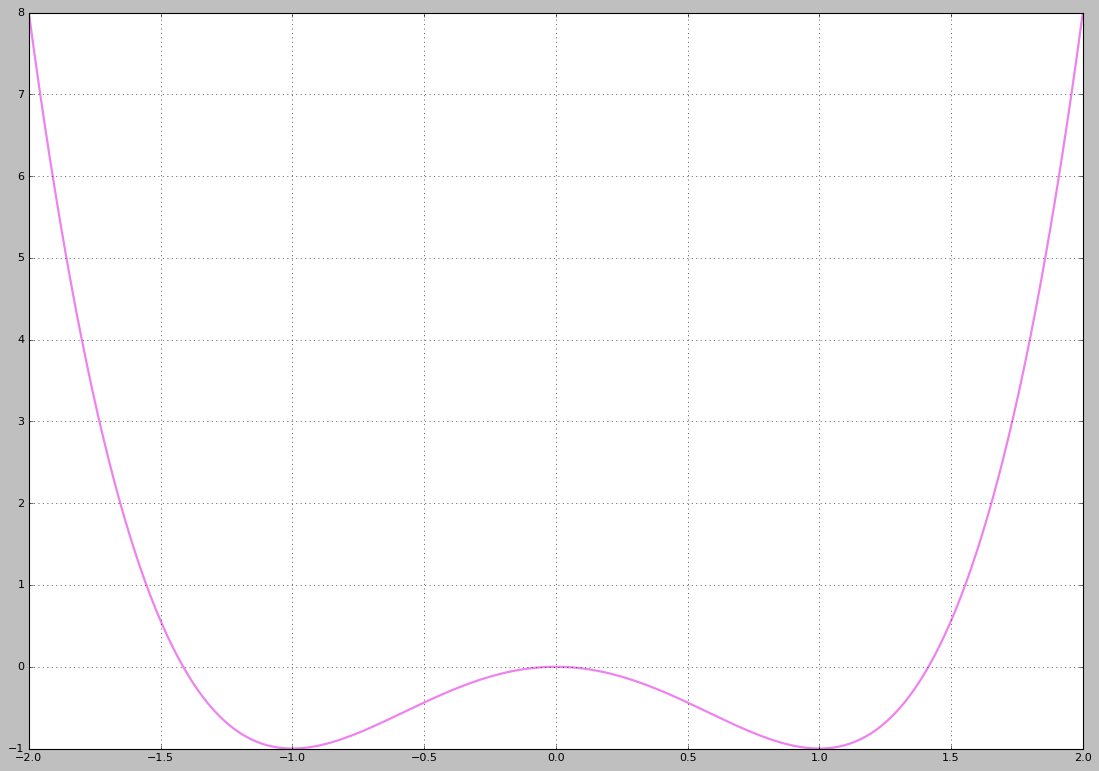

In [18]:
"""" Note on how sym is used first to define a symbolic function and then converted into an actual function that
takes in values through the use of sym.lambdify function in sympy"""

x = sym.Symbol('x')
f = x**4 - 2*x**2
df = sym.diff(f)
f = sym.lambdify(x, f)
df = sym.lambdify(x, df)

x = np.linspace(-2, 2, 200)
y = f(x)

#plt.rc('grid', linestyle=':', color='black', linewidth=2)
plt.plot(x, y, color='violet')
plt.show()

In [19]:
root_bisection = bisection(f, -1.5, 1, 0.0001)
root_Newton = NewtonMethod(f, df, 0.0001, -1.5)

Number of iterations required for 0.0001 accuracy is 13
Bisection num iterations:13
Bisection time: 1.177100011773291e-05
Bisection result: x=-1.414093017578125 f(x)=-0.0006817590351131386

Newton method num iterations:3
Newton method time: 5.7040001593122724e-06
Newton method result: x=-1.4142136333868403 f(x)=4.0171445636616454e-07



#### Newton Method Bad Guess 

In [20]:
#Even a "bad" or "far" guess for Newton's method is faster than the bisection method
root_Newton = NewtonMethod(f, df, 0.0001, -3)
print(f"Newton method result: x={root_Newton} f(x)={f(root_Newton)}")

Newton method num iterations:6
Newton method time: 1.3800000033370452e-05
Newton method result: x=-1.4142279881313702 f(x)=8.160649304311818e-05

Newton method result: x=-1.4142279881313702 f(x)=8.160649304311818e-05


### Exponential Function

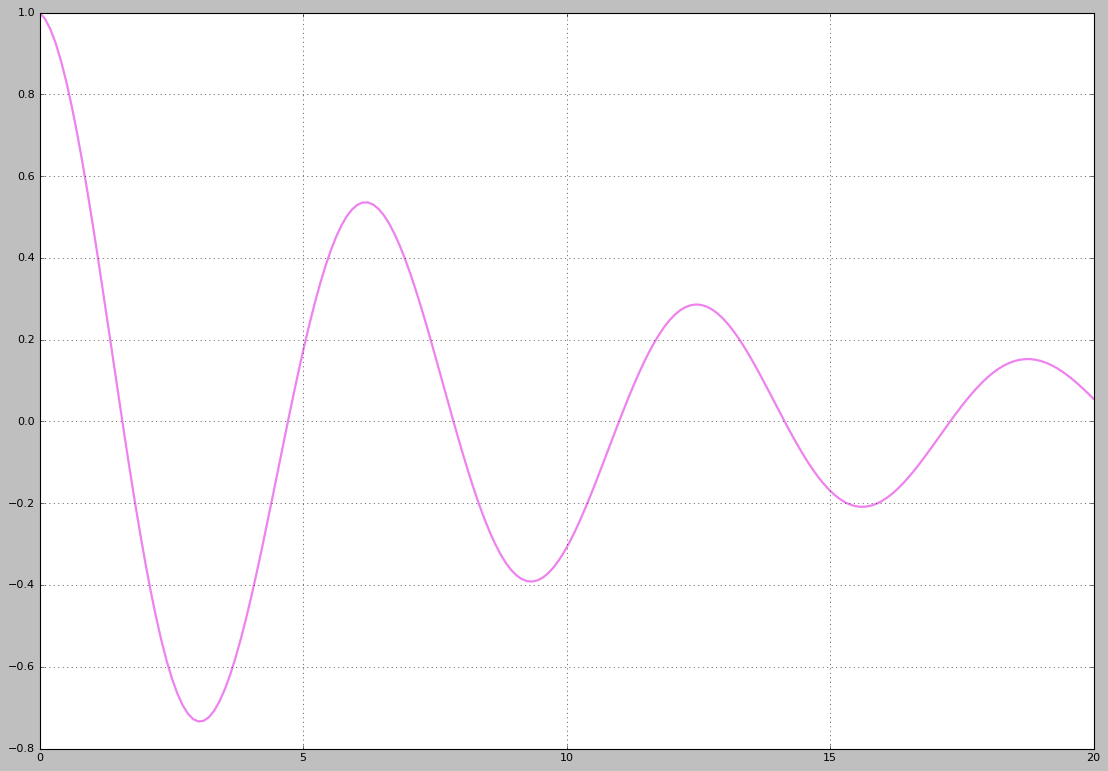

In [21]:
x = sym.Symbol('x')
f = sym.exp(-0.1*x)*sym.cos(x)
df = sym.diff(f)
f = sym.lambdify(x, f)
df = sym.lambdify(x, df)

x = np.linspace(0, 20, 200)
y = [f(x_) for x_ in x]

plt.plot(x, y, color='violet')
plt.show()

In [22]:
root_bisection = bisection(f, 7.5, 10, 0.001)
root_Newton = NewtonMethod(f, df, 0.001, 7.5)

Number of iterations required for 0.001 accuracy is 10
Bisection num iterations:10
Bisection time: 4.491699974096264e-05
Bisection result: x=7.852783203125 f(x)=0.0005464756743810865

Newton method num iterations:2
Newton method time: 4.019700008939253e-05
Newton method result: x=7.853981055268836 f(x)=2.6385398461087314e-07



### Note The Sensitivity of Newton's Method on x0 

In [23]:
root_Newton = NewtonMethod(f, df, 0.001, 6.6)
root_Newton = NewtonMethod(f, df, 0.001, 6.5)
root_Newton = NewtonMethod(f, df, 0.001, 6.4)
root_Newton = NewtonMethod(f, df, 0.001, 6.3)
root_Newton = NewtonMethod(f, df, 0.001, 6.2)

Newton method num iterations:7
Newton method time: 0.0001252960000783787
Newton method result: x=7.853968930515572 f(x)=5.7919986296624465e-06

Newton method num iterations:5
Newton method time: 7.473400000890251e-05
Newton method result: x=14.138042318409733 f(x)=-0.0002129059636923221

Newton method num iterations:2
Newton method time: 3.305100017314544e-05
Newton method result: x=10.995571403213681 f(x)=-9.605421996322504e-07

Newton method num iterations:3
Newton method time: 4.595600012180512e-05
Newton method result: x=14.136092201607779 f(x)=0.0002614450731206348

Newton method num iterations:2
Newton method time: 3.306799999336363e-05
Newton method result: x=68.33155263206795 f(x)=0.0007633300207825847



#### You get a valid root everytime. However, since the function is sinusoidal, the initial guess can greatly impact the root one gets back from this method. With the bisection method, once can pinpoint the root of interest even if it is slower than Newton's method. Hence, which method to use varies on the context of the function and the underlying goal/interest.